In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

url = "https://raw.githubusercontent.com/marianaav26/FisicaComputacional1/main/Actividad1/diarios.txt"

#Asignamos nombre a las columnas 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
 
df_diarios = pd.read_csv(url, names=my_cols, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")

#Se genera una copia, y se trabaja con esta 
df_c = df_diarios.copy()

#Se sustituyen los nulos por espacios en blanco 
str_Nulo ='Nulo'
df_c = df_c.replace(to_replace=str_Nulo, value='', regex=True)

#Se convierten los datos en valores numericos
columnas = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in columnas:
  df_c[cols] = pd.to_numeric(df_c[cols], errors="coerce")

#Nueva copia
df_c1 = df_c.copy()

#Asignacion de formado de fecha
df_c1["Fecha"] = pd.to_datetime(df_c1["Fecha"], dayfirst=True ).copy()

#Anadimos las columnas año y mes
df_c1["Año"] = df_c1["Fecha"].dt.year
df_c1["Mes"] = df_c1["Fecha"].dt.month

In [2]:
#Se cambia el formato numerico por uno de caracteres
df_c1.drop("Mes", axis =1, inplace= True)

df_c1["Mes"] = df_c1["Fecha"].dt.strftime("%b")

df_c1.head()

,Fecha,Precip,Evap,Tmax,Tmin,Año,Mes
0,1961-04-10,0.0,NaN,28.0,NaN,1961,Apr
1,1961-04-11,0.0,6.4,28.0,14.0,1961,Apr
2,1961-04-12,0.0,7.6,31.0,9.5,1961,Apr
3,1961-04-13,0.0,11.0,30.0,8.5,1961,Apr
4,1961-04-14,0.0,8.7,30.0,7.0,1961,Apr


# Graficas sobre los datos de Arizpe

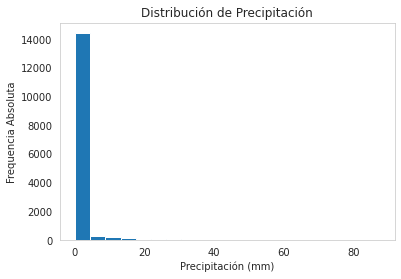

In [30]:
#Se elabora un Histograma
plt.hist(df_c1.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación')
plt.grid()
plt.show()

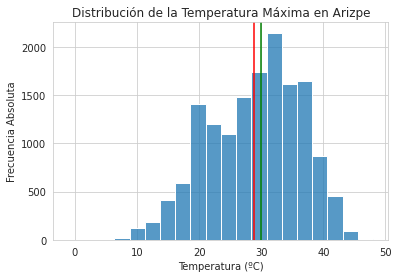

In [6]:
#Estilo de grafica
sns.set_style("whitegrid")

#Cantidades especificas de interes
tmed = df_c1.Tmax.median()
tprom = df_c1.Tmax.mean()

#Se toma el DataaFrame con x o y, y se eligen los datos para cada eje
sns.histplot(data=df_c1, x="Tmax", bins=20)

#Los valores de interes sera lineas verticales
plt.axvline(x=tmed, color="g", label="m")
plt.axvline(x=tprom, color="r", label="x")


#Nombres a los ejes y titulo a la grafica
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de la Temperatura Máxima en Arizpe")

# Imprimimos la grafica
plt.show()

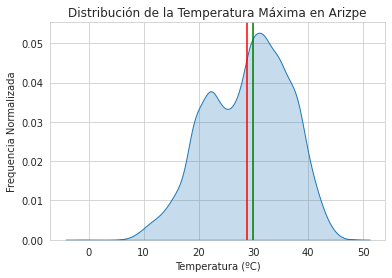

In [8]:
#Grafica funcion de densidad de probabilidad 
sns.set_style("whitegrid")


sns.kdeplot(df_c1.Tmax, fill=True)
plt.axvline(x=tmed, color="g", label="m")
plt.axvline(x=tprom, color="r", label="x")


plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Arizpe')

plt.show()

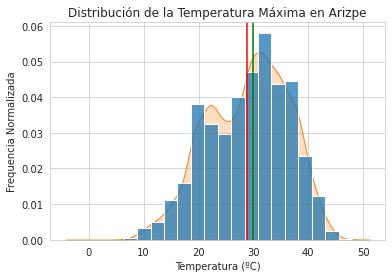

In [9]:
sns.set_style("whitegrid")

sns.histplot(data=df_c1, x="Tmax", bins=20, stat="density")
sns.kdeplot(df_c1.Tmax, fill=True)
plt.axvline(x=tmed, color="g", label="m")
plt.axvline(x=tprom, color="r", label="x")

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Arizpe')

plt.show()

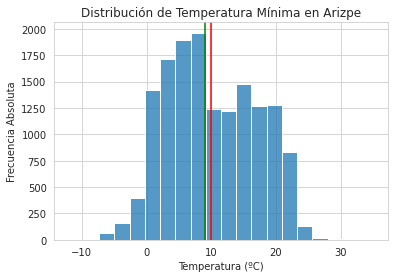

In [10]:
sns.set_style("whitegrid")
sns.histplot(data=df_c1, x="Tmin", bins=20)

tmin_prom=df_c1.Tmin.mean()
tmin_med=df_c1.Tmin.median()

plt.axvline(x=tmin_med, color="g")
plt.axvline(x=tmin_prom, color="r")
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de Temperatura Mínima en Arizpe")

plt.show()

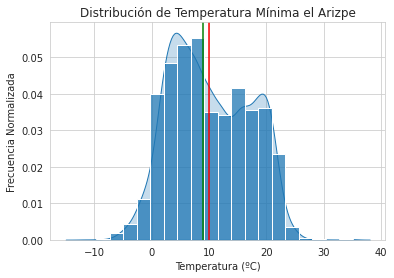

In [11]:
sns.set_style("whitegrid")
sns.kdeplot(df_c1.Tmin, fill=True)
sns.histplot(data=df_c1, x="Tmin", bins=20, stat="density")
plt.axvline(x=tmin_med, color ="g")
plt.axvline(x=tmin_prom, color="r")

plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Normalizada")
plt.title("Distribución de Temperatura Mínima el Arizpe")

plt.show()

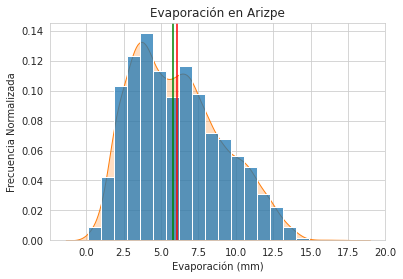

In [12]:
sns.set_style("whitegrid")
sns.histplot(data=df_c1, x= "Evap", bins=20, stat="density")
sns.kdeplot(df_c1["Evap"], fill=True)

Emed=df_c1["Evap"].median()
Eprom=df_c1.Evap.mean()
plt.axvline(x=Emed, color="g")
plt.axvline(x=Eprom, color="r")

plt.xlabel("Evaporación (mm)")
plt.ylabel("Frecuencia Normalizada")
plt.title("Evaporación en Arizpe");

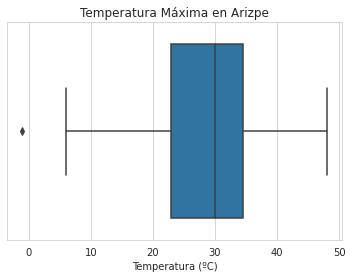

In [14]:
sns.set_style("whitegrid")
sns.boxplot(data=df_c1, x="Tmax", orient="h").set(xlabel="Temperatura (ºC)", title = "Temperatura Máxima en Arizpe");

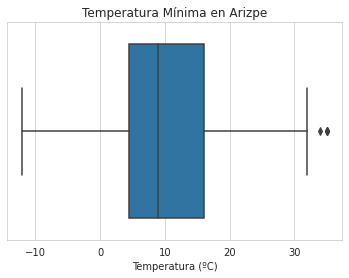

In [15]:
sns.set_style("whitegrid")
sns.boxplot(data=df_c1, x="Tmin", orient="h")
plt.xlabel("Temperatura (ºC)")
plt.title("Temperatura Mínima en Arizpe");

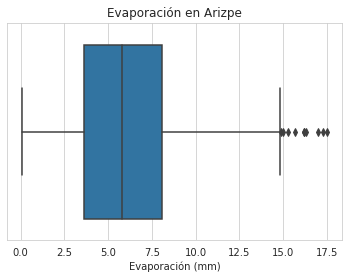

In [16]:
sns.set_style("whitegrid")
sns.boxplot(data=df_c1, x="Evap", orient="h")

plt.xlabel("Evaporación (mm)")
plt.title("Evaporación en Arizpe");

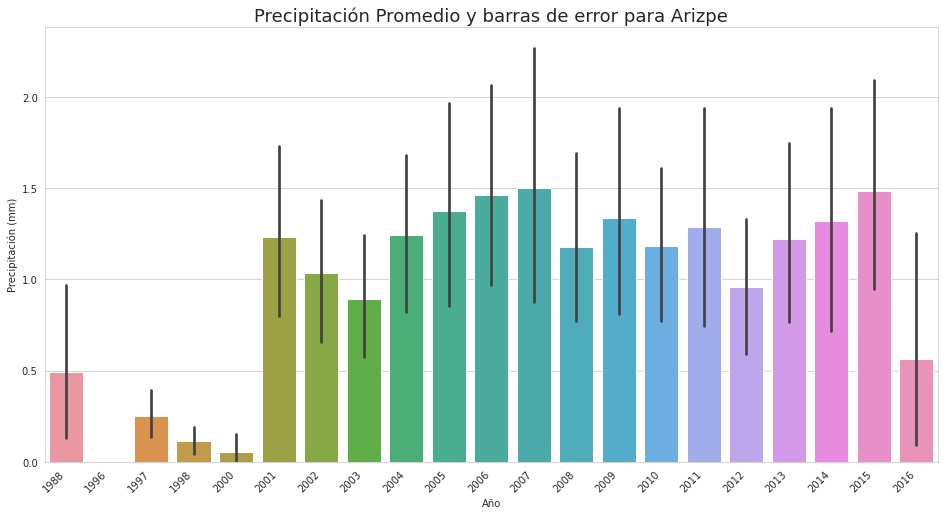

In [18]:
df_muestra = df_c1[(df_c1["Año"] >= 1988) & (df_c1["Año"] <=2018)]

sns.set_style("whitegrid")

plt.figure(figsize=(16,8))

g=sns.barplot(data=df_muestra, x= "Año", y="Precip")
# Rotamos 45 grados las etiquetas
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")

plt.xlabel("Año")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Promedio y barras de error para Arizpe", fontsize=18)
plt.show()

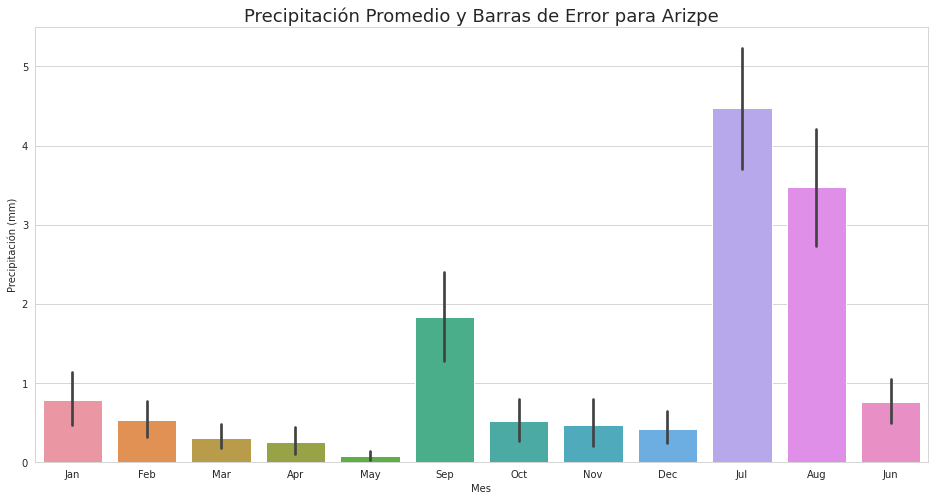

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.barplot(data=df_muestra, x= "Mes", y="Precip")

plt.xlabel("Mes")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Promedio y Barras de Error para Arizpe", fontsize=18)
plt.show()

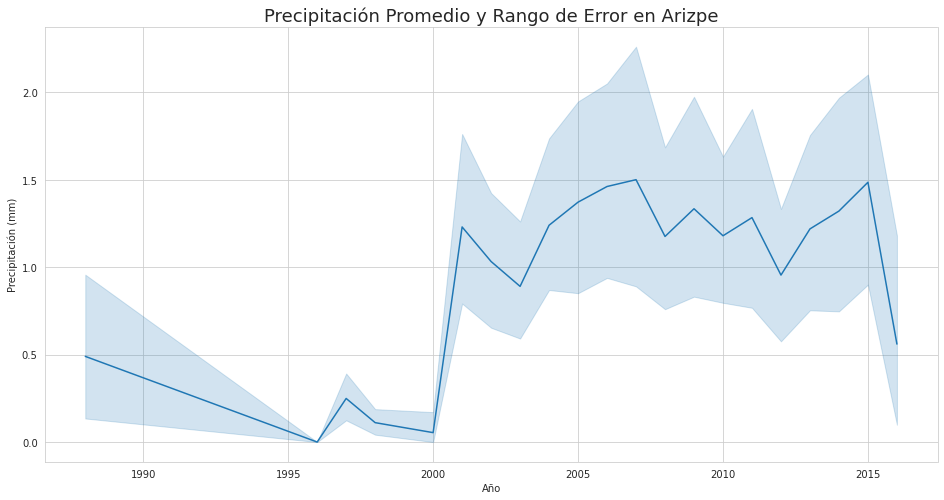

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.lineplot(data=df_muestra, x="Año", y="Precip")
plt.xlabel("Año")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Promedio y Rango de Error en Arizpe", fontsize=18)
plt.show()

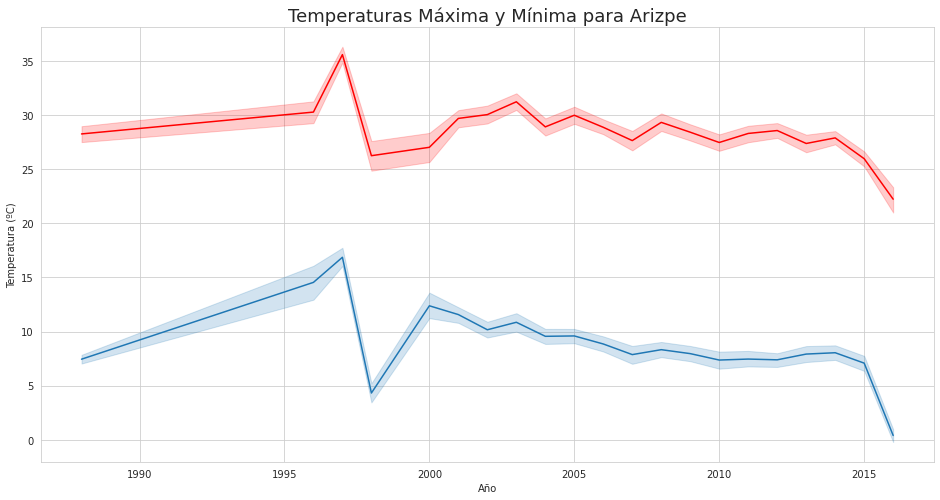

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.lineplot(data=df_muestra, x = "Año", y= "Tmax", color="r")
sns.lineplot(data=df_muestra, x="Año", y = "Tmin")

plt.xlabel("Año")
plt.ylabel("Temperatura (ºC)")
plt.title("Temperaturas Máxima y Mínima para Arizpe", fontsize=18)
plt.show()

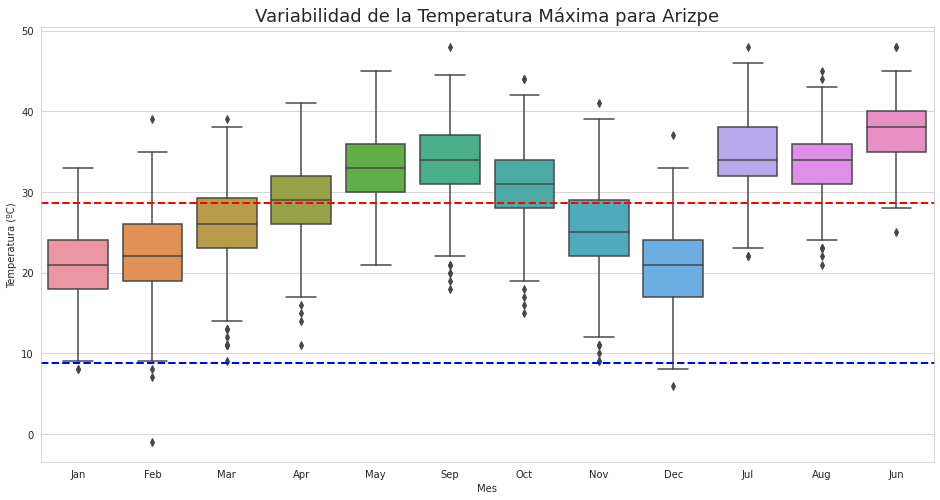

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.boxplot(data=df_muestra, x = "Mes", y= "Tmax", orient="v")
Tmax_p=df_muestra.Tmax.mean()
Tmin_p=df_muestra.Tmin.mean()
plt.axhline(y=Tmax_p, color="r", linestyle="--", linewidth=2)
plt.axhline(y=Tmin_p, color="b", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Temperatura (ºC)")
plt.title("Variabilidad de la Temperatura Máxima para Arizpe", fontsize=18)
plt.show()

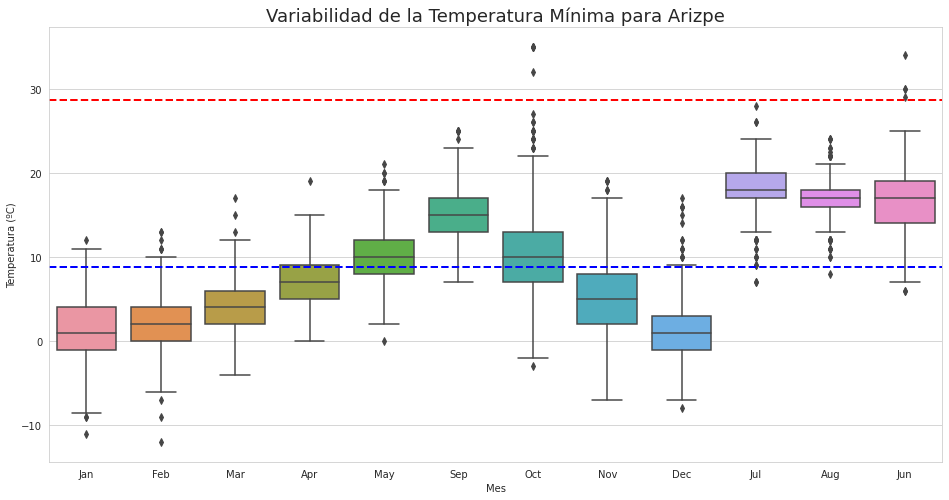

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.boxplot(data=df_muestra, x="Mes", y="Tmin", orient="v")
plt.axhline(y=Tmin_p, color="b", linestyle="--", linewidth=2)
plt.axhline(y=Tmax_p, color="r", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Temperatura (ºC)")
plt.title("Variabilidad de la Temperatura Mínima para Arizpe", fontsize=18)
plt.show()